In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
hrtr = pd.read_csv("C:/Users/Som/Downloads/promotion_tr.csv")

In [177]:
hrtr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [178]:
hrtr.isnull().sum()/len(hrtr)

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [179]:
hrtr.index[hrtr.education.isnull()]

Int64Index([   10,    21,    32,    43,    82,    87,    90,   189,   204,
              231,
            ...
            54599, 54606, 54655, 54671, 54686, 54692, 54717, 54729, 54742,
            54806],
           dtype='int64', length=2409)

In [180]:
hrtr = hrtr.drop(hrtr.index[hrtr.education.isnull()])

In [181]:
hrtr.isnull().sum()/len(hrtr)

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.071356
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [182]:
hrtr.is_promoted.value_counts()

0    47853
1     4546
Name: is_promoted, dtype: int64

In [183]:
female_promoted = np.sum(hrtr[hrtr.gender=="f"]["is_promoted"])/len(hrtr[hrtr.gender=="f"]["is_promoted"])

In [184]:
female_promoted

0.09126311161359212

In [185]:
male_promoted = np.sum(hrtr[hrtr.gender=="m"]["is_promoted"])/len(hrtr[hrtr.gender=="m"]["is_promoted"])

In [186]:
male_promoted

0.0847908328307473

In [187]:
len(hrtr[hrtr.gender=="m"]["is_promoted"])

36478

In [188]:
hrtr.gender.value_counts()

m    36478
f    15921
Name: gender, dtype: int64

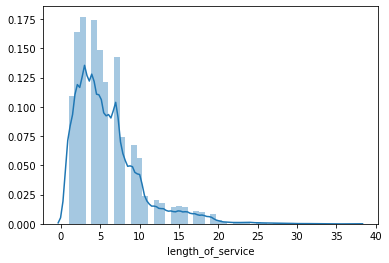

In [189]:
sns.distplot(hrtr.length_of_service)

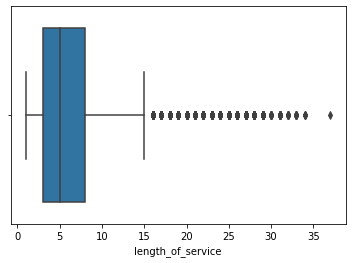

In [190]:
sns.boxplot(hrtr.length_of_service)

In [191]:
hrtr.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [192]:
hrtr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,52399.000000,52399.000000,52399.000000,48660.000000,52399.000000,52399.000000,52399.000000,52399.000000,52399.000000
mean,39184.187141,1.256207,34.980229,3.337526,5.932556,0.356801,0.023168,63.627207,0.086757
std,22598.386766,0.613465,7.618984,1.257922,4.276440,0.479060,0.150439,13.297899,0.281482
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19651.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39207.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58738.500000,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [193]:
hrtr.length_of_service.value_counts()

3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
1     4119
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: length_of_service, dtype: int64

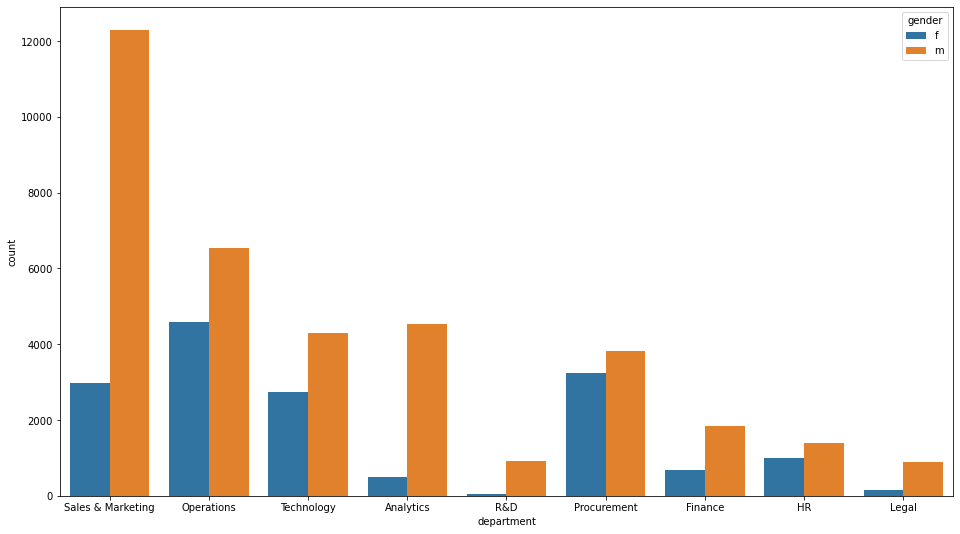

In [194]:
plt.figure(figsize=(16,9))
ax=sns.countplot(x=hrtr['department'],hue=hrtr['gender'])

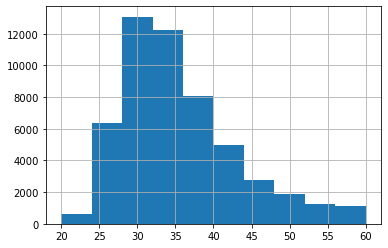

In [195]:
hrtr['age'].hist()

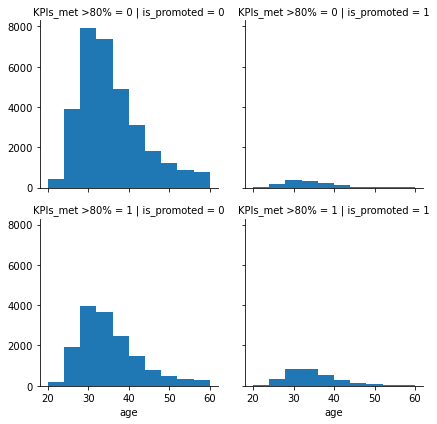

In [196]:
grid = sns.FacetGrid(hrtr, col='is_promoted', row='KPIs_met >80%')
grid.map(plt.hist, 'age')
grid.add_legend();

In [197]:
hrtr[['KPIs_met >80%','is_promoted']].groupby(['KPIs_met >80%'], as_index=False).sum()

,KPIs_met >80%,is_promoted
0,0,1370
1,1,3176


In [198]:
hrtr.previous_year_rating.value_counts()

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64

In [199]:
hrtr[hrtr['previous_year_rating'].isnull()].length_of_service.value_counts()

1    3739
Name: length_of_service, dtype: int64

In [200]:
hrtr.department.value_counts()

Sales & Marketing    15265
Operations           11122
Procurement           7066
Technology            7039
Analytics             5015
Finance               2500
HR                    2386
Legal                 1035
R&D                    971
Name: department, dtype: int64

In [201]:
hrtr.region.value_counts()

region_2     11497
region_22     6108
region_7      4624
region_15     2617
region_13     2592
region_26     2160
region_31     1841
region_4      1701
region_27     1575
region_16     1410
region_11     1291
region_28     1234
region_23     1147
region_29      975
region_19      864
region_32      861
region_20      849
region_14      804
region_17      787
region_25      785
region_5       759
region_6       676
region_10      644
region_30      644
region_8       642
region_1       596
region_24      507
region_12      498
region_21      403
region_9       372
region_3       344
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [202]:
hrtr.recruitment_channel.value_counts()

other       29061
sourcing    22204
referred     1134
Name: recruitment_channel, dtype: int64

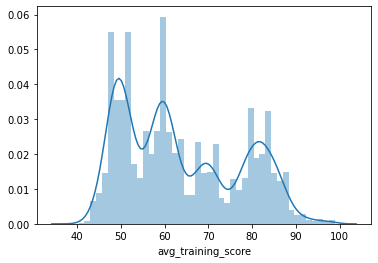

In [203]:
sns.distplot(hrtr['avg_training_score'])

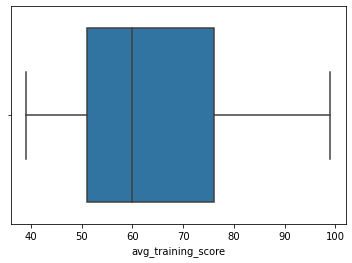

In [204]:
sns.boxplot(hrtr['avg_training_score'])

In [205]:
hrtr['previous_year_rating'] = hrtr.previous_year_rating.fillna(0)

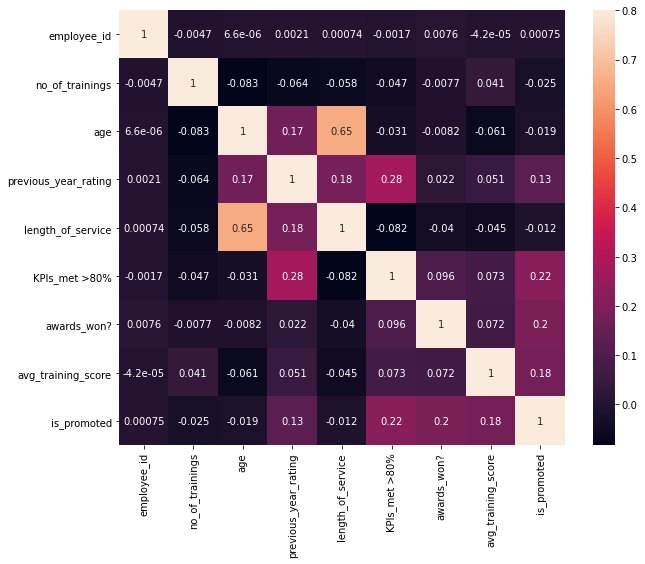

In [206]:
corr_matrix = hrtr.corr()
f , ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [207]:
hrtr.isnull().sum()/len(hrtr)

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [208]:
hrtr = pd.get_dummies(hrtr, columns=['recruitment_channel'], prefix='rc')

In [209]:
hrtr = pd.get_dummies(hrtr, columns=['department'], prefix='dept')

In [210]:
hrtr = pd.get_dummies(hrtr, columns=['education'], prefix='edu')

In [211]:
hrtr

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,dept_HR,dept_Legal,dept_Operations,dept_Procurement,dept_R&D,dept_Sales & Marketing,dept_Technology,edu_Bachelor's,edu_Below Secondary,edu_Master's & above
0,65438,region_7,f,1,35,5.0,8,1,0,49,...,0,0,0,0,0,1,0,0,0,1
1,65141,region_22,m,1,30,5.0,4,0,0,60,...,0,0,1,0,0,0,0,1,0,0
2,7513,region_19,m,1,34,3.0,7,0,0,50,...,0,0,0,0,0,1,0,1,0,0
3,2542,region_23,m,2,39,1.0,10,0,0,50,...,0,0,0,0,0,1,0,1,0,0
4,48945,region_26,m,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,region_14,m,2,31,1.0,2,0,0,49,...,0,0,0,0,0,1,0,1,0,0
54803,3030,region_14,m,1,48,3.0,17,0,0,78,...,0,0,0,0,0,0,1,1,0,0
54804,74592,region_27,f,1,37,2.0,6,0,0,56,...,0,0,1,0,0,0,0,0,0,1
54805,13918,region_1,m,1,27,5.0,3,1,0,79,...,0,0,0,0,0,0,0,1,0,0


In [212]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
hrtr['gender']= le.fit_transform(hrtr['gender'])

In [213]:
hrtr = hrtr.drop(['employee_id'], axis =1)

In [214]:
hrtr

,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,dept_HR,dept_Legal,dept_Operations,dept_Procurement,dept_R&D,dept_Sales & Marketing,dept_Technology,edu_Bachelor's,edu_Below Secondary,edu_Master's & above
0,region_7,0,1,35,5.0,8,1,0,49,0,...,0,0,0,0,0,1,0,0,0,1
1,region_22,1,1,30,5.0,4,0,0,60,0,...,0,0,1,0,0,0,0,1,0,0
2,region_19,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,1,0,1,0,0
3,region_23,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,1,0,1,0,0
4,region_26,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,region_14,1,2,31,1.0,2,0,0,49,0,...,0,0,0,0,0,1,0,1,0,0
54803,region_14,1,1,48,3.0,17,0,0,78,0,...,0,0,0,0,0,0,1,1,0,0
54804,region_27,0,1,37,2.0,6,0,0,56,0,...,0,0,1,0,0,0,0,0,0,1
54805,region_1,1,1,27,5.0,3,1,0,79,0,...,0,0,0,0,0,0,0,1,0,0


In [215]:
hrtr.shape

(52399, 25)

In [216]:
hrtr.loc[hrtr['no_of_trainings']>=5,'no_of_trainings']='5_10'
hrtr['no_of_trainings'].value_counts()

1       42317
2        7708
3        1726
4         454
5_10      194
Name: no_of_trainings, dtype: int64

In [217]:
hrtr.loc[hrtr['length_of_service']>30,'length_of_service']=30
hrtr['length_of_service'].value_counts()

3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
1     4119
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
19     319
20     128
21      74
24      67
23      62
22      60
30      54
25      49
26      41
27      36
29      30
28      29
Name: length_of_service, dtype: int64

In [218]:
hrtr['Age_Awards_Won']=hrtr['age'] * hrtr['awards_won?']
hrtr['Age_Awards_Won'].head()

0    0
1    0
2    0
3    0
4    0
Name: Age_Awards_Won, dtype: int64

In [219]:
hrtr = pd.get_dummies(hrtr, columns=['no_of_trainings'], prefix='no_of_trainings')

In [220]:
hrtr = pd.get_dummies(hrtr, columns=['previous_year_rating'], prefix='previous_year_rating')

In [221]:
hrtr= hrtr.drop(['gender','region'], axis=1)

In [222]:
hrtr.columns

Index(['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'rc_other', 'rc_referred',
       'rc_sourcing', 'dept_Analytics', 'dept_Finance', 'dept_HR',
       'dept_Legal', 'dept_Operations', 'dept_Procurement', 'dept_R&D',
       'dept_Sales & Marketing', 'dept_Technology', 'edu_Bachelor's',
       'edu_Below Secondary', 'edu_Master's & above', 'Age_Awards_Won',
       'no_of_trainings_1', 'no_of_trainings_2', 'no_of_trainings_3',
       'no_of_trainings_4', 'no_of_trainings_5_10', 'previous_year_rating_0.0',
       'previous_year_rating_1.0', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0'],
      dtype='object')

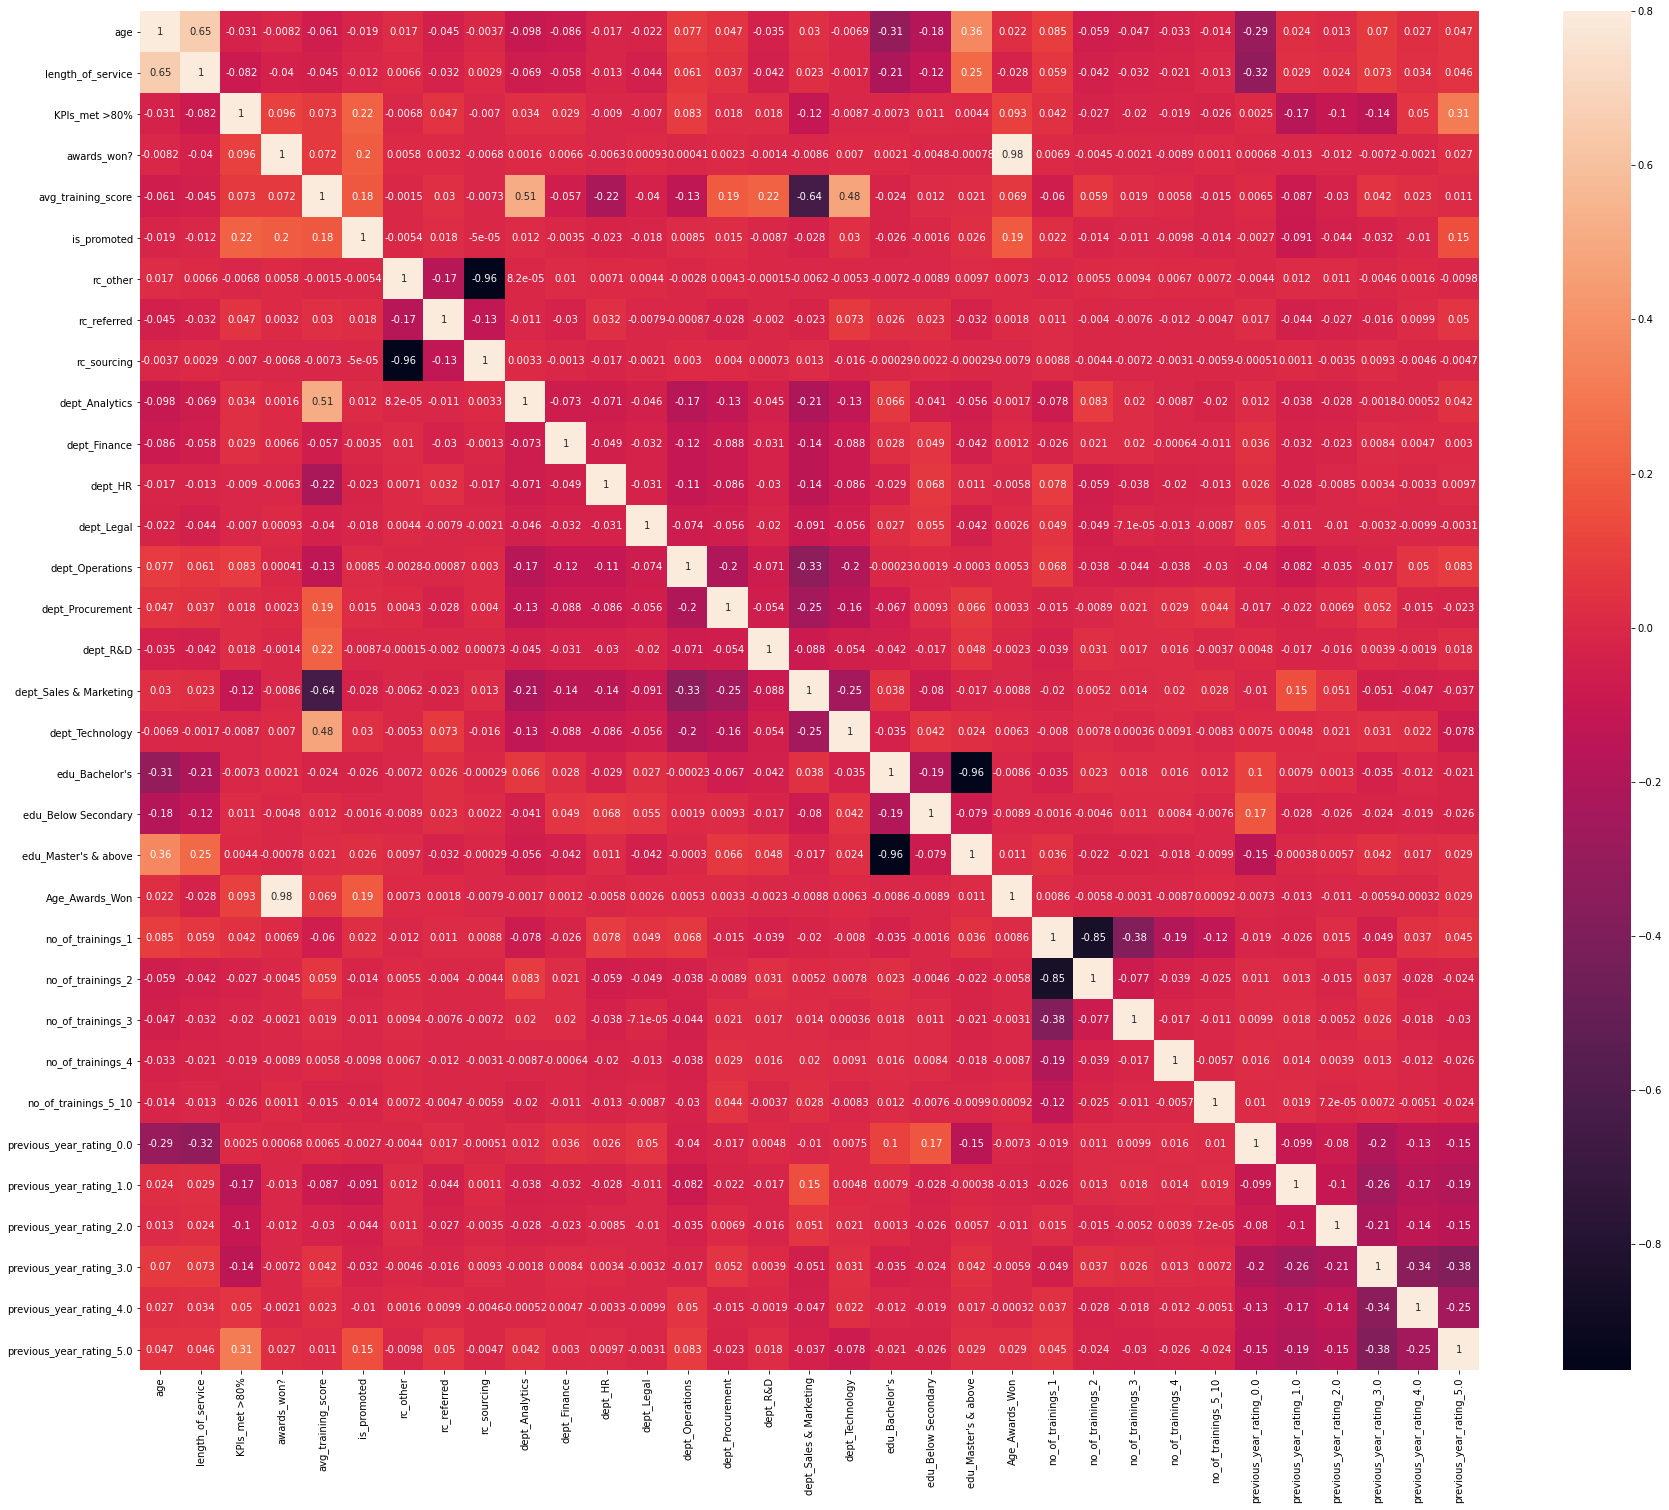

In [224]:
corr_matrix = hrtr.corr()
f , ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [225]:
hrtr

,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,rc_other,rc_referred,rc_sourcing,dept_Analytics,...,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,35,8,1,0,49,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,30,4,0,0,60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34,7,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,39,10,0,0,50,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,45,2,0,0,73,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,31,2,0,0,49,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
54803,48,17,0,0,78,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
54804,37,6,0,0,56,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54805,27,3,1,0,79,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [227]:
hrtr.columns

Index(['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'rc_other', 'rc_referred',
       'rc_sourcing', 'dept_Analytics', 'dept_Finance', 'dept_HR',
       'dept_Legal', 'dept_Operations', 'dept_Procurement', 'dept_R&D',
       'dept_Sales & Marketing', 'dept_Technology', 'edu_Bachelor's',
       'edu_Below Secondary', 'edu_Master's & above', 'Age_Awards_Won',
       'no_of_trainings_1', 'no_of_trainings_2', 'no_of_trainings_3',
       'no_of_trainings_4', 'no_of_trainings_5_10', 'previous_year_rating_0.0',
       'previous_year_rating_1.0', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0'],
      dtype='object')

In [228]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [233]:
hrtr = hrtr.rename(columns={'KPIs_met >80%' : 'KPIs_met_greater_80', 'awards_won?' : 'awards_won', 'dept_Sales & Marketing' : 'dept_Sales_and_Marketing', "edu_Bachelor's": "edu_Bachelors","edu_Master's & above" : "edu_Masters_and_above","dept_R&D":"dept_R_and_D","edu_Below Secondary":"edu_Below_Secondary","previous_year_rating_0.0":"previous_year_rating_0","previous_year_rating_1.0":"previous_year_rating_1","previous_year_rating_2.0":"previous_year_rating_2","previous_year_rating_3.0":"previous_year_rating_3","previous_year_rating_4.0":"previous_year_rating_4","previous_year_rating_5.0":"previous_year_rating_5"})

In [234]:
hrtr

,age,length_of_service,KPIs_met_greater_80,awards_won,avg_training_score,is_promoted,rc_other,rc_referred,rc_sourcing,dept_Analytics,...,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_0,previous_year_rating_1,previous_year_rating_2,previous_year_rating_3,previous_year_rating_4,previous_year_rating_5
0,35,8,1,0,49,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,30,4,0,0,60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34,7,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,39,10,0,0,50,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,45,2,0,0,73,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,31,2,0,0,49,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
54803,48,17,0,0,78,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
54804,37,6,0,0,56,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54805,27,3,1,0,79,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [231]:
hrtr.columns

Index(['age', 'length_of_service', 'KPIs_met_greater_80', 'awards_won',
       'avg_training_score', 'is_promoted', 'rc_other', 'rc_referred',
       'rc_sourcing', 'dept_Analytics', 'dept_Finance', 'dept_HR',
       'dept_Legal', 'dept_Operations', 'dept_Procurement', 'dept_R_and_D',
       'dept_Sales_and_Marketing', 'dept_Technology', 'edu_Bachelors',
       'edu_Below_Secondary', 'edu_Masters_and_above', 'Age_Awards_Won',
       'no_of_trainings_1', 'no_of_trainings_2', 'no_of_trainings_3',
       'no_of_trainings_4', 'no_of_trainings_5_10', 'previous_year_rating_0.0',
       'previous_year_rating_1.0', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0'],
      dtype='object')

In [258]:
model = smf.glm(formula = "is_promoted ~ avg_training_score", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                 Results: Generalized linear model
Model:                GLM              AIC:            29267.6958  
Link Function:        logit            BIC:            -540115.7862
Dependent Variable:   is_promoted      Log-Likelihood: -14632.     
Date:                 2020-12-03 22:31 LL-Null:        -15456.     
No. Observations:     52399            Deviance:       29264.      
Df Model:             1                Pearson chi2:   5.36e+04    
Df Residuals:         52397            Scale:          1.0000      
Method:               IRLS                                         
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.4863   0.0844 -65.0273 0.0000 -5.6516 -5.3209
avg_training_score  0.0467   0.0012  39.7316 0.0000  0.0444  0.0490



In [259]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                 Results: Generalized linear model
Model:               GLM               AIC:             27044.3722  
Link Function:       logit             BIC:             -542330.2433
Dependent Variable:  is_promoted       Log-Likelihood:  -13519.     
Date:                2020-12-03 22:34  LL-Null:         -15456.     
No. Observations:    52399             Deviance:        27038.      
Df Model:            2                 Pearson chi2:    4.57e+04    
Df Residuals:        52396             Scale:           1.0000      
Method:              IRLS                                           
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           -6.1930   0.0901 -68.7278 0.0000 -6.3696 -6.0164
avg_training_score   0.0454   0.0012  37.4000 0.0000  0.0431  0.0478
KPIs_met_greater_80  1.5387   0.0343  44.8933 0.0000

In [260]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80+awards_won", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                 Results: Generalized linear model
Model:               GLM               AIC:             26341.0584  
Link Function:       logit             BIC:             -543024.6903
Dependent Variable:  is_promoted       Log-Likelihood:  -13167.     
Date:                2020-12-03 22:34  LL-Null:         -15456.     
No. Observations:    52399             Deviance:        26333.      
Df Model:            3                 Pearson chi2:    4.51e+04    
Df Residuals:        52395             Scale:           1.0000      
Method:              IRLS                                           
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           -6.1428   0.0911 -67.4068 0.0000 -6.3214 -5.9642
avg_training_score   0.0438   0.0012  35.6226 0.0000  0.0414  0.0462
KPIs_met_greater_80  1.4864   0.0347  42.7983 0.0000

In [261]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80+awards_won+previous_year_rating_5", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              26026.5433  
Link Function:        logit              BIC:              -543330.3388
Dependent Variable:   is_promoted        Log-Likelihood:   -13008.     
Date:                 2020-12-03 22:35   LL-Null:          -15456.     
No. Observations:     52399              Deviance:         26017.      
Df Model:             4                  Pearson chi2:     4.42e+04    
Df Residuals:         52394              Scale:            1.0000      
Method:               IRLS                                             
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -6.2691   0.0921 -68.0889 0.0000 -6.4495 -6.0886
avg_training_score      0.0441   0.0012  35.7021 0.0000  0.0416  0.0465
KPIs_met_gr

In [264]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80+awards_won+previous_year_rating_5", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              26026.5433  
Link Function:        logit              BIC:              -543330.3388
Dependent Variable:   is_promoted        Log-Likelihood:   -13008.     
Date:                 2020-12-03 22:36   LL-Null:          -15456.     
No. Observations:     52399              Deviance:         26017.      
Df Model:             4                  Pearson chi2:     4.42e+04    
Df Residuals:         52394              Scale:            1.0000      
Method:               IRLS                                             
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -6.2691   0.0921 -68.0889 0.0000 -6.4495 -6.0886
avg_training_score      0.0441   0.0012  35.7021 0.0000  0.0416  0.0465
KPIs_met_gr

In [269]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80+awards_won+previous_year_rating_5+no_of_trainings_1", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              25989.9546  
Link Function:        logit              BIC:              -543358.0609
Dependent Variable:   is_promoted        Log-Likelihood:   -12989.     
Date:                 2020-12-03 22:38   LL-Null:          -15456.     
No. Observations:     52399              Deviance:         25978.      
Df Model:             5                  Pearson chi2:     4.41e+04    
Df Residuals:         52393              Scale:            1.0000      
Method:               IRLS                                             
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -6.5457   0.1033 -63.3834 0.0000 -6.7481 -6.3433
avg_training_score      0.0449   0.0012  36.0941 0.0000  0.0424  0.0473
KPIs_met_gr

In [272]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80+awards_won+previous_year_rating_5+no_of_trainings_1+dept_Technology+rc_referred", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                   Results: Generalized linear model
Model:                GLM                AIC:              25933.7965  
Link Function:        logit              BIC:              -543396.4857
Dependent Variable:   is_promoted        Log-Likelihood:   -12959.     
Date:                 2020-12-03 22:40   LL-Null:          -15456.     
No. Observations:     52399              Deviance:         25918.      
Df Model:             7                  Pearson chi2:     4.35e+04    
Df Residuals:         52391              Scale:            1.0000      
Method:               IRLS                                             
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -6.7473   0.1063 -63.4822 0.0000 -6.9556 -6.5390
avg_training_score      0.0487   0.0013  36.6503 0.0000  0.0461  0.0513
KPIs_met_gr

In [ ]:
model = smf.glm(formula = "is_promoted ~ avg_training_score+KPIs_met_greater_80+awards_won+previous_year_rating_5+no_of_trainings_1+dept_Technology", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

In [ ]:
model = smf.glm(formula = "is_promoted ~ age+avg_training_score+length_of_service+KPIs_met_greater_80+awards_won+dept_Analytics+dept_Finance+dept_HR+dept_Legal+dept_Operations+dept_Procurement+dept_R_and_D+dept_Sales_and_Marketing++dept_Technology+edu_Bachelors+edu_Below_Secondary+edu_Masters_and_above+no_of_trainings_1+no_of_trainings_2+no_of_trainings_3+no_of_trainings_4+no_of_trainings_5_10+previous_year_rating_0+previous_year_rating_1+previous_year_rating_2+previous_year_rating_3+previous_year_rating_4+previous_year_rating_5", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

In [239]:
model = smf.glm(formula = "is_promoted ~ age+avg_training_score+length_of_service+KPIs_met_greater_80+awards_won+dept_Analytics+dept_Finance+dept_HR+dept_Operations+dept_Procurement+dept_R_and_D+dept_Sales_and_Marketing++dept_Technology+edu_Bachelors+edu_Below_Secondary+edu_Masters_and_above+no_of_trainings_1+no_of_trainings_2+no_of_trainings_3+no_of_trainings_4+no_of_trainings_5_10+previous_year_rating_0+previous_year_rating_1+previous_year_rating_2+previous_year_rating_3+previous_year_rating_4+previous_year_rating_5", data=hrtr, family=sm.families.Binomial())
result = model.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                   GLM                 AIC:               21053.8785  
Link Function:           logit               BIC:               -548125.6708
Dependent Variable:      is_promoted         Log-Likelihood:    -10502.     
Date:                    2020-12-03 21:38    LL-Null:           -15456.     
No. Observations:        52399               Deviance:          21004.      
Df Model:                24                  Pearson chi2:      4.26e+04    
Df Residuals:            52374               Scale:             1.0000      
Method:                  IRLS                                               
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
Intercept                -13.2642   0.2353 -56.3830 0.0000 -13.7253 -12.8031
age                  

In [240]:
model8 = smf.glm(formula = "is_promoted ~ age+avg_training_score+length_of_service+KPIs_met_greater_80+awards_won+dept_Analytics+dept_HR+dept_Operations+dept_Procurement+dept_R_and_D+dept_Sales_and_Marketing++dept_Technology+edu_Bachelors+edu_Below_Secondary+edu_Masters_and_above+no_of_trainings_1+no_of_trainings_2+no_of_trainings_3+no_of_trainings_4+no_of_trainings_5_10+previous_year_rating_0+previous_year_rating_1+previous_year_rating_2+previous_year_rating_3+previous_year_rating_4+previous_year_rating_5", data=hrtr, family=sm.families.Binomial())
result = model8.fit()
print(result.summary2())

                     Results: Generalized linear model
Model:                   GLM                 AIC:               21052.8118  
Link Function:           logit               BIC:               -548135.6041
Dependent Variable:      is_promoted         Log-Likelihood:    -10502.     
Date:                    2020-12-03 21:38    LL-Null:           -15456.     
No. Observations:        52399               Deviance:          21005.      
Df Model:                23                  Pearson chi2:      4.26e+04    
Df Residuals:            52375               Scale:             1.0000      
Method:                  IRLS                                               
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
Intercept                -13.1866   0.2202 -59.8815 0.0000 -13.6182 -12.7550
age                  

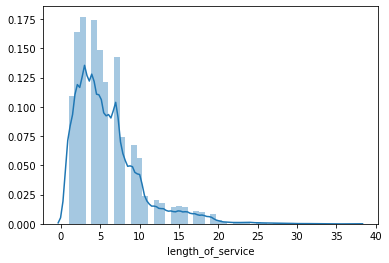

In [171]:
sns.distplot(hrtr.length_of_service)

In [294]:
x = hrtr.drop('is_promoted', axis =1)

In [295]:
y = hrtr[['age','is_promoted']]

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [298]:
y_train = pd.DataFrame(y_train)

In [299]:
y_train

,age,is_promoted
19024,45,0
49860,30,0
43807,32,0
17657,23,0
41098,36,0
...,...,...
13733,29,0
34897,27,0
4679,27,0
21719,31,0


In [ ]:
model1 = smf.glm(formula = "is_promoted ~ age+avg_training_score+length_of_service+KPIs_met_greater_80+awards_won+dept_Analytics+dept_HR+dept_Operations+dept_Procurement+dept_R_and_D+dept_Sales_and_Marketing++dept_Technology+edu_Bachelors+edu_Below_Secondary+edu_Masters_and_above+no_of_trainings_1+no_of_trainings_2+no_of_trainings_3+no_of_trainings_4+no_of_trainings_5_10+previous_year_rating_0+previous_year_rating_1+previous_year_rating_2+previous_year_rating_3+previous_year_rating_4+previous_year_rating_5", data=hrtr1, family=sm.families.Binomial())
result = model8.fit()
print(result.summary2())

In [248]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


92.76

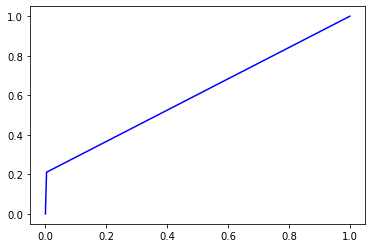

In [249]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='b')

In [250]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, 
                       Y_pred))

[[14292    53]
 [ 1085   290]]
